In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn import linear_model

In [2]:
nba1415=pd.read_csv("//Users/yuelyu/Desktop/131-Group-Project/NBA14-15.csv")
nba1516=pd.read_csv("//Users/yuelyu/Desktop/131-Group-Project/NBA15-16.csv")
nba1617=pd.read_csv("//Users/yuelyu/Desktop/131-Group-Project/NBA16-17.csv")
nba1718=pd.read_csv("//Users/yuelyu/Desktop/131-Group-Project/NBA17-18.csv")
nba1819=pd.read_csv("//Users/yuelyu/Desktop/131-Group-Project/NBA18-19.csv")
nba1415['YEAR']="2014-15"
nba1516['YEAR']="2015-16"
nba1617['YEAR']="2016-17"
nba1718['YEAR']="2017-18"
nba1819['YEAR']="2018-19"

In [41]:
nba=pd.concat([nba1415,nba1516,nba1617,nba1718,nba1819])
nba['TEAM']=np.where(nba['TEAM']=='Los Angeles Clippers','LA Clippers',nba['TEAM'])
nba.head()

,TEAM,GP,W,L,WIN%,MIN,PTS,FGM,FGA,FG%,...,AST RATIO,OREB%,DREB%,REB%,TOV%,EFG%,TS%,PACE,PIE,YEAR
0,Golden State Warriors,82,67,15,0.817,3946,9016,3410,7137,47.8,...,19.7,27.3,70.3,49.8,14.5,54.0,57.1,99.29,56.9,2014-15
1,Atlanta Hawks,82,60,22,0.732,3946,8409,3121,6699,46.6,...,19.5,26.4,69.7,48.7,15.0,52.7,56.3,94.66,54.0,2014-15
2,Houston Rockets,82,56,26,0.683,3961,8522,3032,6832,44.4,...,16.5,30.5,68.6,49.6,17.0,51.2,54.8,97.38,50.9,2014-15
3,LA Clippers,82,56,26,0.683,3946,8751,3228,6830,47.3,...,18.7,27.2,71.6,49.7,12.9,53.3,56.5,95.41,54.0,2014-15
4,Memphis Grizzlies,82,55,27,0.671,3981,8062,3097,6763,45.8,...,16.9,28.8,71.6,50.3,14.2,48.9,53.1,92.85,53.0,2014-15
5,San Antonio Spurs,82,55,27,0.671,3991,8461,3208,6854,46.8,...,18.4,27.2,73.0,50.7,14.6,51.7,55.5,94.48,54.5,2014-15
6,Cleveland Cavaliers,82,53,29,0.646,3956,8457,3089,6739,45.8,...,17.1,31.1,71.1,51.3,15.2,52.0,55.7,93.23,51.4,2014-15
7,Portland Trail Blazers,82,51,31,0.622,3971,8429,3175,7049,45.0,...,16.8,28.2,72.8,51.0,14.2,50.8,54.4,95.08,52.2,2014-15
8,Chicago Bulls,82,50,32,0.610,3976,8265,3001,6797,44.2,...,16.6,31.2,70.9,51.6,14.7,48.9,53.6,93.81,52.9,2014-15
9,Dallas Mavericks,82,50,32,0.610,3976,8628,3255,7036,46.3,...,17.0,26.9,68.1,47.7,13.3,51.5,55.0,96.41,52.1,2014-15


In [23]:
x=nba.REB
y=nba.PACE

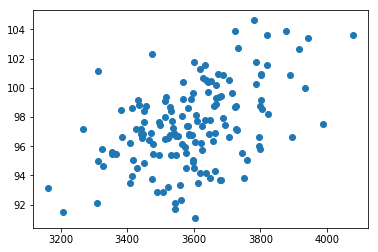

In [24]:
plt.scatter(x,y)
plt.show()

In [25]:
model = linear_model.LinearRegression(fit_intercept = True)

In [26]:
x=np.asarray(x)
y=np.asarray(y)

In [27]:
x=x.reshape([150,1])
y=y.reshape([150,1])

In [28]:
model.fit(x, y)
print(model)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)


In [29]:
print(model.coef_)
print(model.intercept_)

[[0.00861493]]
[66.44332091]


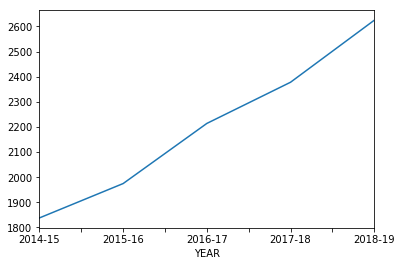

In [15]:
nba.groupby('YEAR')['3PA'].mean().plot()

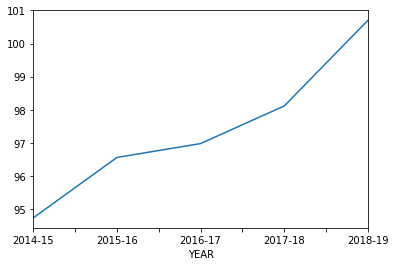

In [30]:
nba.groupby('YEAR').PACE.mean().plot()

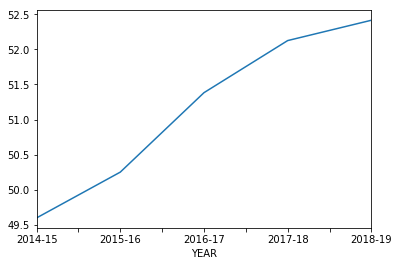

In [32]:
nba.groupby('YEAR')['EFG%'].mean().plot()

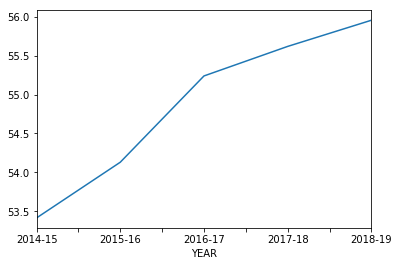

In [33]:
nba.groupby('YEAR')['TS%'].mean().plot()

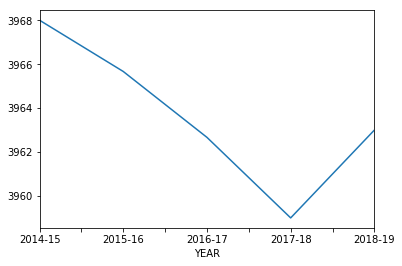

In [34]:
nba.groupby('YEAR').MIN.mean().plot()

In [40]:
nba.groupby('TEAM')['WIN%'].describe().sort_values('mean',ascending=False)

,count,mean,std,min,25%,50%,75%,max
TEAM,,,,,,,,
Golden State Warriors,5.0,0.7852,0.082548,0.695,0.707,0.817,0.817,0.890
San Antonio Spurs,5.0,0.6780,0.104163,0.573,0.585,0.671,0.744,0.817
Toronto Raptors,5.0,0.6660,0.053493,0.598,0.622,0.683,0.707,0.720
Houston Rockets,5.0,0.6586,0.105030,0.500,0.646,0.671,0.683,0.793
LA Clippers,5.0,0.6096,0.065187,0.512,0.585,0.622,0.646,0.683
Boston Celtics,5.0,0.5976,0.070536,0.488,0.585,0.598,0.646,0.671
Oklahoma City Thunder,5.0,0.5952,0.046056,0.549,0.573,0.585,0.598,0.671
Portland Trail Blazers,5.0,0.5806,0.060604,0.500,0.537,0.598,0.622,0.646
Cleveland Cavaliers,5.0,0.5610,0.186778,0.232,0.610,0.622,0.646,0.695
